In [29]:
import seaborn as sns
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
dataframe = pd.read_csv('data-raw/melbourne_housing_raw.csv', parse_dates = [7])
#date'leri defaultta object olarak okur. Tarih sütununu doğru okumak için, 
#tarih sütunlarının bir listesini belirtmek için parse_dates değişkenini kullanabiliriz.

In [31]:
dataframe.info()
#info() fonksiyonu dataframe'in özeti yazdırır. 
#Yazdırdığı özellikler : the index dtype and column dtypes, non-null values and memory usage.
dataframe.dtypes
#biz bu notebookta genellikle dtypes kullanıyor olacağız.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  object 
 8   Postcode       34856 non-null  float64
 9   Bedroom2       26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13742 non-null  float64
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Lattitude      26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance          object
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [32]:
dataframe.head()
#fonksiyon baştan itibaren göstereceği satır sayısını parametre olarak alır, vermezsek default'u 5'tir.

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/9/16,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/16,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,4/2/16,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,4/2/16,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,4/3/17,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Veri ön işleme teknikleri hakkında raporda daha geniş bilgi verilmiştir. Bu notebook'ta sadece kullandığımız adımlardan bahsediyor olacağım.
Verimiz üzerinde bazı ön işleme adımları izleyeceğiz, yapacağımız işlemler: 
   * Özellikler Üzerinde İyileştirme
   * Kayıp Verilerin Doldurulması
   * Kategorik Verileri İşleme

## Özellikler Üzerinde İyileştirme
* Elimizdeki veri üzerinde evlerin lokasyonunu tanımlamak için birden fazla özellik olduğunu görüyoruz. Sadece lokasyon tanımlamak için kullanılan sütunlar; Sburb, Address, PostCode, Lattitude, Longtitude. Aynı özelliği belirten sütunlar içerisinden özelliği spesifik olarak tanımlamaya yeten sutünları seçerek diğerlerini silebiliriz.

* Method, SellerG, Propertycount ve Date sutünları da bu analiz için gereksiz görünüyor, bu bağlamda özellikleri silerek daha doğru bir analiz edebiliriz.

* Binanın inşaa yılı(YearBuilt) özelliği yerine binanın yaşı için Yaş = Bulunduğumuz Yıl - Binanın İnşaa Yılı tanımlamasını yapabiliriz.

* Silmek için df.drop( ) metodunu kullanıyoruz. Bu fonksiyon, spesifik olarak silmek istediğiniz sütun veya satırları özelleştirerek kaldırabilmemizi mümkün kılar.

* Yeni sütün eklemek içinse dataframe['Age'] = 2020 - dataframe['YearBuilt'] tanımlamasını yapıyoruz.

In [33]:
dataframe['Age'] = 2020 - dataframe['YearBuilt']
# Yaş (Age) özelliğini dataframe ekliyoruz.

In [34]:
dataframe = dataframe.drop([ 'Postcode', 'Method', 'SellerG', 'Propertycount', 'Date', 'YearBuilt', 'Bedroom2'], axis = 1)
# Yukarıda nedenleriniyle birlikte açıklamış olduğum silinecek özellikleri tablodan çıkartıyoruz.

In [35]:
dataframe.head()
#verimize tekrardan göz atıyoruz, yaptığımız değişiklikleri inceliyoruz.

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Age
0,Abbotsford,2,h,NaN,2.5,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,NaN
1,Abbotsford,2,h,1480000.0,2.5,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,NaN
2,Abbotsford,2,h,1035000.0,2.5,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,120.0
3,Abbotsford,3,u,NaN,2.5,2.0,1.0,0.0,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,NaN
4,Abbotsford,3,h,1465000.0,2.5,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,120.0


In [36]:
dataframe.dtypes
#dtypes kullanarak daha hızlı inceleyebiliriz

Suburb           object
Rooms             int64
Type             object
Price           float64
Distance         object
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
CouncilArea      object
Lattitude       float64
Longtitude      float64
Regionname       object
Age             float64
dtype: object

## Kayıp Verilerin Doldurulması
* Kayıp verileri doldurmak için öncelikle hangi özelliğimizde ne kadar kayıp olduğuna bakmalıyız. Kayıp verilerin sayılarını görmek için dataframe.isnull().sum() fonksiyonlarını kullanıyoruz. Bu noktada sonuçlara bakarak çıkarım yapmak ve veri üzerinde bazı değişiklikler yapmak durumundayız. 
* Verimizi kullanarak evlerin fiyatları üzerinde çalışacağamızdan dolayı, fiyat özelliği boş olan veriler bizim işimize yaramıyor. Fiyat bilgisi olmayan tüm satırları sileceğiz.

In [37]:
# Her özellik(sütun) için kayıp verilerin sayısı
dataframe.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Distance            1
Bathroom         8226
Car              8728
Landsize        11810
BuildingArea    21115
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Age             19306
dtype: int64

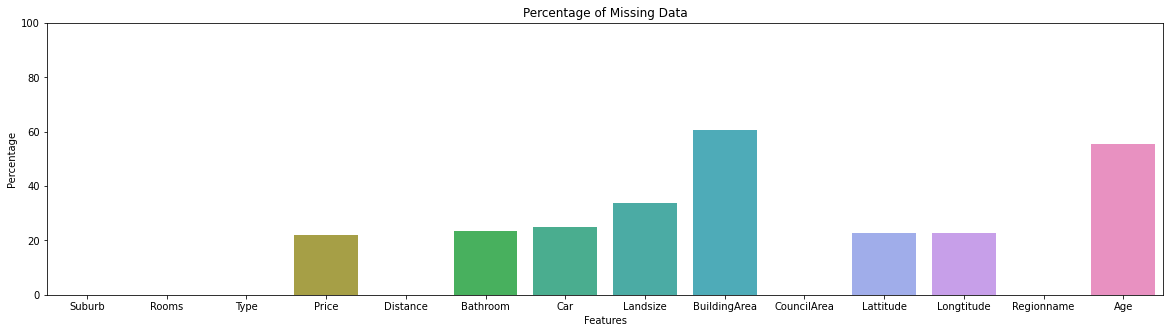

In [38]:
# Kayıp verilerin görselleştirilmesi
plt.figure(figsize=(20,5))
plt.title('Percentage of Missing Data')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.ylim(0, 100)
sns.barplot(x = dataframe.columns, y = dataframe.isnull().sum()/len(dataframe)*100)
plt.show()

Text(0.5, 1.0, 'Korelasyon')

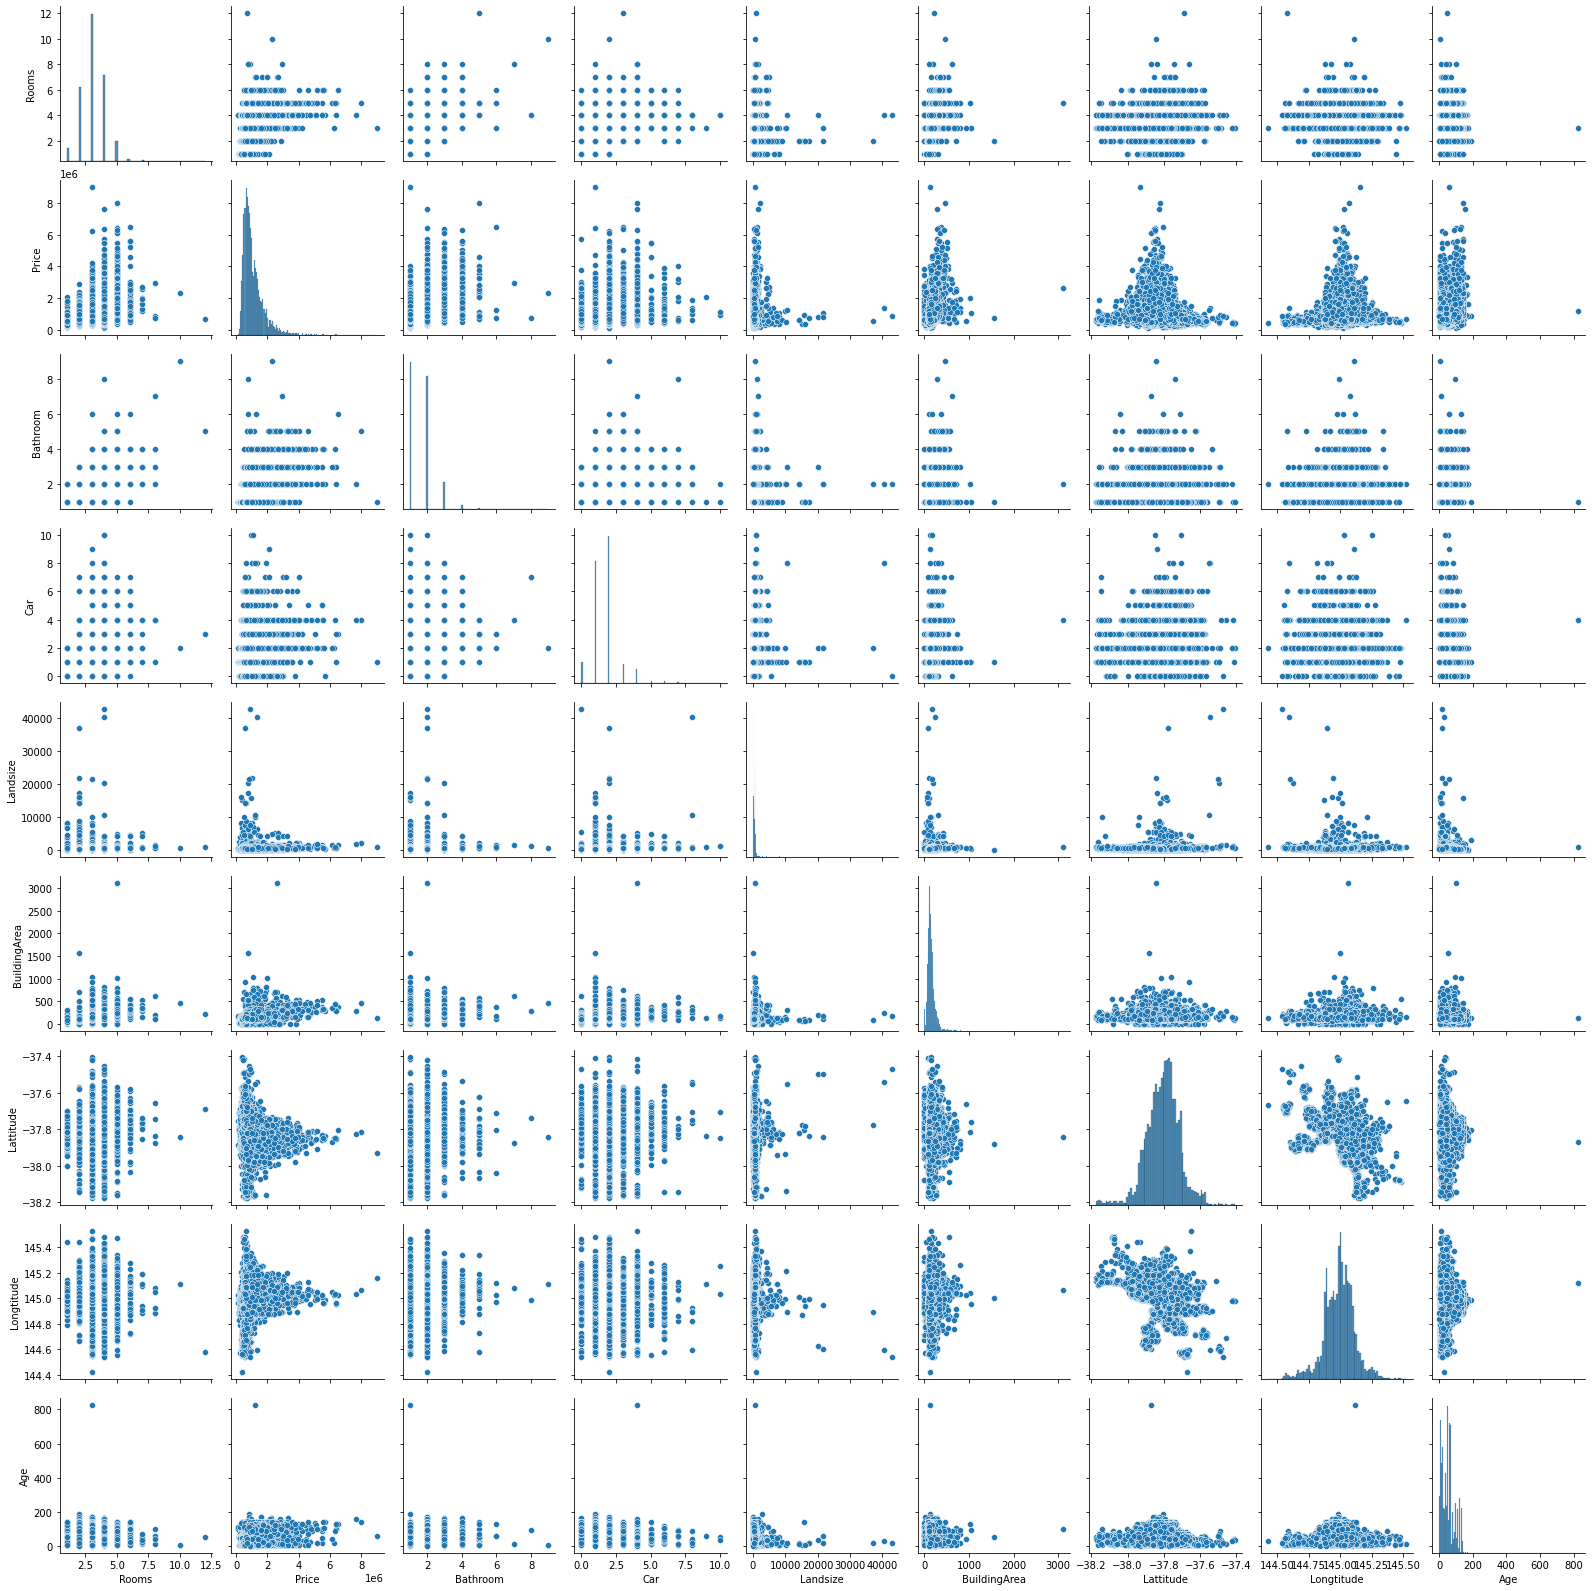

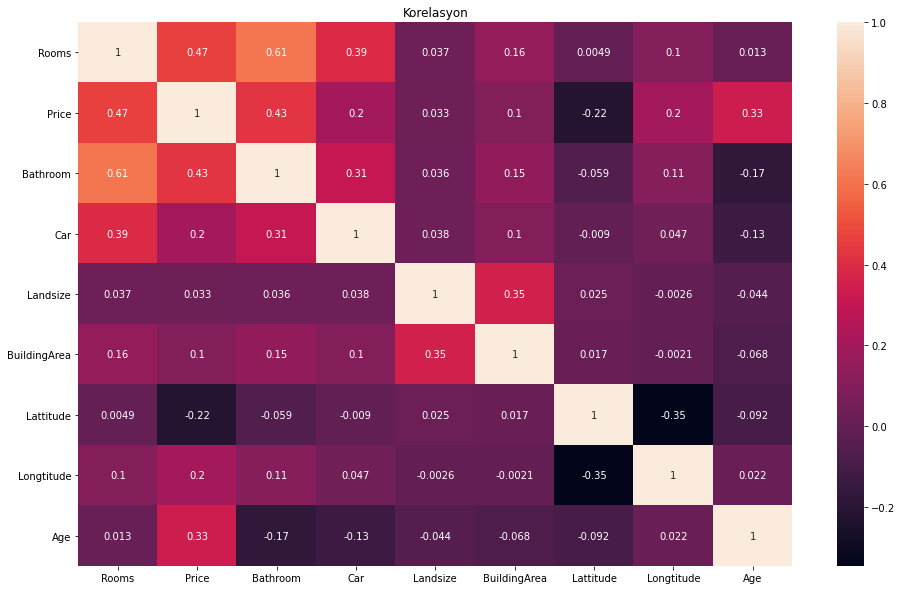

In [39]:
sns.pairplot(dataframe.dropna())

plt.figure(figsize=(16,10))
sns.heatmap(dataframe.corr(), annot= True) 
plt.title('Korelasyon') 
#Korelasyon incelemesi yapıyoruz

### Çıkarım:
* Fiyatı bulmakla ilgilendiğimiz için, fiyat eksik olan satırları sileceğiz.
* Gözlemlerin yarısından fazlasında BuildingArea olmadığını görebiliriz. 
* Gözlemlerin yaklasık 30%'unda Landsize, Age, Lattitude ve Longitude eksik, hepsini ortalama değer ile doldurabiliriz.
* Car ve Bathroom verisi eksik, mod ile doldurabiliriz.

In [40]:
dataframe = dataframe.dropna(subset=['Price'])
# 'price' alanı boş olan satırları siliyoruz.

### Şimdi, veri kümesini hesaplamaya başlamadan önce bölmek ve training data elde etmek için iyi bir noktadayız.

In [41]:
from sklearn.model_selection import train_test_split

# Train Test Split fonksiyonu
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('Price', axis = 1), dataframe['Price'], test_size = .20, random_state= 0)

In [42]:
from sklearn.impute import SimpleImputer

# Imputerları tanımlıyoruz
mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

mean_imputer_features = ['Landsize', 'Age', 'Lattitude', 'Longtitude', 'BuildingArea']
# Yukarıda bahsettiğimiz gibi bu özellikleri ortalama değer ile tamamlıyoruz.
mode_imputer_features = ['Car', 'Bathroom']
#Yukarıda bahsettiğimiz gibi bu değerleri mod ile tamamlıyoruz.

# Perform Imiputations
mean_imputed_features_train = pd.DataFrame(mean_imputer.fit_transform(X_train[mean_imputer_features]), columns = mean_imputer_features)
mean_imputed_features_test = pd.DataFrame(mean_imputer.transform(X_test[mean_imputer_features]), columns = mean_imputer_features)
mode_imputed_features_train = pd.DataFrame(mean_imputer.fit_transform(X_train[mode_imputer_features]), columns = mode_imputer_features)
mode_imputed_features_test = pd.DataFrame(mean_imputer.transform(X_test[mode_imputer_features]), columns = mode_imputer_features)

In [43]:
X_train = X_train.drop(mean_imputer_features, axis = 1)
X_train = X_train.drop(mode_imputer_features, axis = 1)
X_test = X_test.drop(mean_imputer_features, axis = 1)
X_test = X_test.drop(mode_imputer_features, axis = 1)
# imputasyon yapılan mevcut özellikleri dropla

X_train = X_train.reset_index()
X_train = X_train.drop('index', axis = 1)
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis = 1)
#Frame'in indekslerini resetle ve son ekleni dropla

X_train[mean_imputer_features] = mean_imputed_features_train[mean_imputer_features]
X_train[mode_imputer_features] = mode_imputed_features_train[mode_imputer_features]
X_test[mean_imputer_features] = mean_imputed_features_test[mean_imputer_features]
X_test[mode_imputer_features] = mode_imputed_features_test[mode_imputer_features]
# imputed özellkleri orjinal dataframe'e ekliyoruz.

In [44]:
# Merge Training Features and Labels
y_train = y_train.reset_index()
y_train.drop('index', axis=1)
dataframe_train = X_train.copy()
dataframe_train['Price'] = y_train['Price']
dataframe_train.head()

,Suburb,Rooms,Type,Distance,CouncilArea,Regionname,Landsize,Age,Lattitude,Longtitude,BuildingArea,Car,Bathroom,Price
0,Glenroy,3,h,11.2,Moreland City Council,Northern Metropolitan,746.000000,60.000000,-37.710510,144.909250,152.000000,1.000000,1.000000,865000.0
1,Watsonia North,3,h,14.5,Banyule City Council,Northern Metropolitan,538.000000,53.118158,-37.701780,145.085100,158.411245,1.000000,1.000000,705000.0
2,Richmond,2,u,2.4,Yarra City Council,Northern Metropolitan,607.501288,53.118158,-37.806687,144.996239,158.411245,1.718254,1.591749,736000.0
3,Reservoir,4,h,12,Darebin City Council,Northern Metropolitan,646.000000,70.000000,-37.726530,145.018550,168.000000,2.000000,1.000000,1000000.0
4,South Melbourne,2,u,1.9,Port Phillip City Council,Southern Metropolitan,607.501288,53.118158,-37.806687,144.996239,158.411245,1.718254,1.591749,1272000.0


In [45]:
dataframe_train.isnull().sum()

Suburb          0
Rooms           0
Type            0
Distance        1
CouncilArea     3
Regionname      3
Landsize        0
Age             0
Lattitude       0
Longtitude      0
BuildingArea    0
Car             0
Bathroom        0
Price           0
dtype: int64

Birkaç eksik değerimiz olduğunu görüyoruz(Distance,CouncilArea,Reigionname), bunları droplayacağız.

In [46]:
dataframe_train = dataframe_train.dropna()
#Eksik değerleri dropna() fonksiyonu ile kaldırıyoruz.

In [47]:
X_train = dataframe_train.drop('Price', axis=1)
y_train = dataframe_train['Price']
## Eğitim Özelliklerini ve Etiketlerini ayırıyoruz

## Kategorik Verileri İşleme
İçlerinde kategorileri olan özelliklere bir göz atıp, önem derecelerini inceleyeceğiz.

In [48]:
# Kategorik değişkenleri inceleyelim 
object_columns = [column for column in X_train.columns if X_train[column].dtype == 'object']

object_columns

['Suburb', 'Type', 'Distance', 'CouncilArea', 'Regionname']

In [49]:
object_unique = list(map(lambda column: X_train[column].nunique(), object_columns))
dictionary = dict(zip(object_columns, object_unique))
# Kategorik verilerle her sütunda unique girişlerin sayısı 

# unique olanları sırala 
sorted(dictionary.items(), key=lambda x: x[1])

[('Type', 3),
 ('Regionname', 8),
 ('CouncilArea', 33),
 ('Distance', 212),
 ('Suburb', 341)]

### Çıkarım: 
OneHot, Type ve Regionname önem derecesine göre yalnızca anlamlı bir şekilde kodlayabiliriz. Buradaki kategorilerin hiçbiri label encoded olamaz, çünkü özellikler arasında belirli bir öncelik yok. Yüksek kardinalite nedeniyle CouncilArea ve Suburb'u drop etmemiz gerekecek.

In [50]:
# yüksek kardinalite olan özellikleri sil
X_train = X_train.drop(['CouncilArea', 'Suburb'], axis=1)
X_test = X_test.drop(['CouncilArea', 'Suburb'], axis=1)

In [51]:
from sklearn.preprocessing import OneHotEncoder

# bahsettiğimiz gibi encode edilecek özelliker
one_hot_features = ['Type', 'Regionname']

#Kategorik verilerle her bir sütuna bir one-hot enc. uyguluyoruz.
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_train = pd.DataFrame(OH_encoder.fit_transform(X_train[one_hot_features]))
OH_test = pd.DataFrame(OH_encoder.transform(X_test[one_hot_features]))

In [52]:
# One-hot encoding indeksi kaldırıldı; geri koy
OH_train.index = X_train.index
OH_test.index = X_test.index

# Kategorik sutünlarısil, one-hot enc ile replace et.
X_train = X_train.drop(one_hot_features, axis=1)
X_test = X_test.drop(one_hot_features, axis=1)

# Sayısal özelliklere one-hot enc. sütunlar ekle
X_train = pd.concat([X_train, OH_train], axis=1)
X_test = pd.concat([X_test, OH_test], axis=1)

In [53]:
X_train.head()

,Rooms,Distance,Landsize,Age,Lattitude,Longtitude,BuildingArea,Car,Bathroom,0,1,2,3,4,5,6,7,8,9,10
0,3,11.2,746.000000,60.000000,-37.710510,144.909250,152.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3,14.5,538.000000,53.118158,-37.701780,145.085100,158.411245,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2.4,607.501288,53.118158,-37.806687,144.996239,158.411245,1.718254,1.591749,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,12,646.000000,70.000000,-37.726530,145.018550,168.000000,2.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,1.9,607.501288,53.118158,-37.806687,144.996239,158.411245,1.718254,1.591749,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Tüm kategorik özellikleri dönüştürdük.

## Scaling

In [54]:
from sklearn.preprocessing import RobustScaler

# Transform
transformer = RobustScaler().fit(X_train)
X_train_scaled = transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)

# Algoritmaların Uygulanması

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [56]:
# Models Object
models = {
    'LinearRegression': {
        'model': LinearRegression()
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [57]:
# attributeları dict e ekle
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [62]:
# MAE, MSE, EVE, R2 raporda açıklanmıştır.
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train_scaled, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test_scaled)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['evs'] = metrics.explained_variance_score(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    
    print('Mean Absolute Error: ', models[model]['errors']['mae'])
    print('Mean Squared Error: ', models[model]['errors']['mse'])
    print('Explained Variance Error: ', models[model]['errors']['evs'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2 Score: ', models[model]['scores']['r2'])
    print('\n')

Running  LinearRegression()
Mean Absolute Error:  276907.10834066453
Mean Squared Error:  190378911450.44968
Explained Variance Error:  0.5535609893875975
RMSE:  436324.31911417644
R2 Score:  0.5535466961582458


Running  DecisionTreeRegressor(max_depth=9, min_samples_split=4, random_state=1)
Mean Absolute Error:  210354.67170614714
Mean Squared Error:  135222152610.54773
Explained Variance Error:  0.6829068495830195
RMSE:  367725.64856227767
R2 Score:  0.6828935709022286




/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


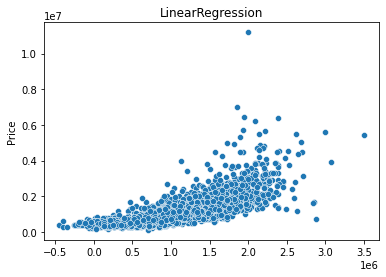

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


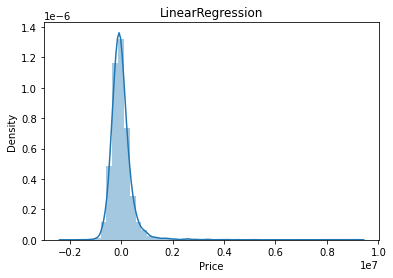

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


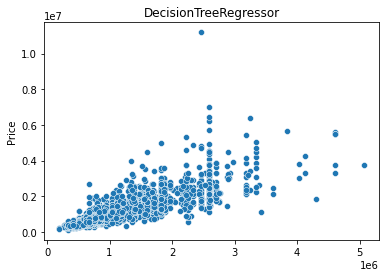

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


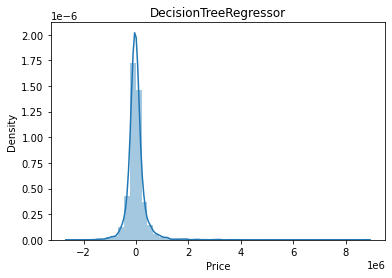

In [59]:
# Analyse 
for index, model in enumerate(models):
    sns.scatterplot(models[model]['predictions'], y_test)
    plt.title(model)
    plt.show()
    sns.distplot((y_test - models[model]['predictions']))
    plt.title(model)
    plt.show()
    

# Sonuç
R2 puanı ve Açıklanan Varyans Değeri göze alındığında sıralama;
* Karar Ağaçları
* Lineer Regresyon

şeklinde olacaktır.